In [1]:
from skimage.io import imread, imshow
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
from sen1floods11_dataset import Sen1Floods11Dataset, Sen1Floods11DataModule

In [2]:
import os
ROOT = os.path.dirname(os.getcwd())
hand_labeled_data = os.path.join(ROOT, 'sen1floods11', 'hand_labeled.csv')
weak_labeled_data = os.path.join(ROOT, 'sen1floods11', 'weak_labeled.csv')

In [3]:
def sample_img(dataset, idx=None):
    if not idx:
        idx = np.random.randint(len(dataset))
        
    _, ax = plt.subplots(1,3)
    
    ax[0].imshow(dataset['img'][idx][0])
    ax[1].imshow(dataset['img'][idx][1])
    ax[2].imshow(dataset['label'][idx])
    
    for a in ax:
        a.set_xticks([])
        a.set_yticks([])
        
    plt.show()
    
    return None

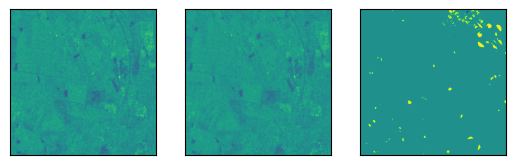

In [8]:
hand_labeled = Sen1Floods11DataModule(hand_labeled_data, 'HandLabeled', 8, debug=True, transforms=True)
hand_labeled.prepare_data()
train = hand_labeled.train_dataloader()
sample_img(next(iter(train)))

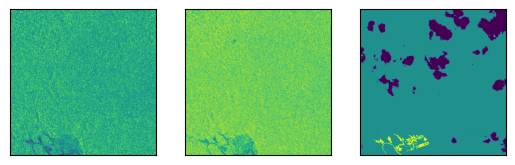

In [5]:
weakly_labeled = Sen1Floods11DataModule(weak_labeled_data, 'WeaklyLabeled', 8, debug=True)
weakly_labeled.prepare_data()
train = weakly_labeled.train_dataloader()
sample_img(next(iter(train)))